In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import json

from sharkfin.simulation import visualize_simulation_data

In [2]:
sim_stats = open('../output/20221121-e_sim_stats.txt').read()

In [3]:
sim_stats

'{"error_message": null, "status_code": "0", "q": 2, "r": 60, "market_class": "<class \'sharkfin.markets.MockMarket\'>", "ror_volatility": 0.011159307948874611, "ror_mean": -0.0003762706443337066, "dividend_growth_rate": 1.000628, "dividend_std": 0.011988, "seconds": 6, "end_day": 120, "log_return_autocorrelation": -0.07107755258809201, "log_return_squared_autocorrelation": 0.1656565323168353, "(\'aLvl_mean\', \'CRRA=3.33, DiscFac=0.95\')": 1.118942040559226, "(\'aLvl_mean\', \'CRRA=3.33, DiscFac=0.97\')": 1.0499619426093578, "(\'aLvl_mean\', \'CRRA=6.0, DiscFac=0.95\')": 1.3236500478982018, "(\'aLvl_mean\', \'CRRA=6.0, DiscFac=0.97\')": 1.1556665701714675, "(\'aLvl_mean\', \'CRRA=8.67, DiscFac=0.95\')": 1.3935242485792136, "(\'aLvl_mean\', \'CRRA=8.67, DiscFac=0.97\')": 1.3637321737426042, "(\'aLvl_std\', \'CRRA=3.33, DiscFac=0.95\')": 0.9035970537643394, "(\'aLvl_std\', \'CRRA=3.33, DiscFac=0.97\')": 0.7701730709228931, "(\'aLvl_std\', \'CRRA=6.0, DiscFac=0.95\')": 1.0218055528722167

In [4]:
json.loads(sim_stats)

{'error_message': None,
 'status_code': '0',
 'q': 2,
 'r': 60,
 'market_class': "<class 'sharkfin.markets.MockMarket'>",
 'ror_volatility': 0.011159307948874611,
 'ror_mean': -0.0003762706443337066,
 'dividend_growth_rate': 1.000628,
 'dividend_std': 0.011988,
 'seconds': 6,
 'end_day': 120,
 'log_return_autocorrelation': -0.07107755258809201,
 'log_return_squared_autocorrelation': 0.1656565323168353,
 "('aLvl_mean', 'CRRA=3.33, DiscFac=0.95')": 1.118942040559226,
 "('aLvl_mean', 'CRRA=3.33, DiscFac=0.97')": 1.0499619426093578,
 "('aLvl_mean', 'CRRA=6.0, DiscFac=0.95')": 1.3236500478982018,
 "('aLvl_mean', 'CRRA=6.0, DiscFac=0.97')": 1.1556665701714675,
 "('aLvl_mean', 'CRRA=8.67, DiscFac=0.95')": 1.3935242485792136,
 "('aLvl_mean', 'CRRA=8.67, DiscFac=0.97')": 1.3637321737426042,
 "('aLvl_std', 'CRRA=3.33, DiscFac=0.95')": 0.9035970537643394,
 "('aLvl_std', 'CRRA=3.33, DiscFac=0.97')": 0.7701730709228931,
 "('aLvl_std', 'CRRA=6.0, DiscFac=0.95')": 1.0218055528722167,
 "('aLvl_std', '

In [5]:
data = pd.read_csv('../output/20221121-e_data.csv')

In [6]:
data

,Unnamed: 0,t,prices,dividends,buy,sell,ror,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,expected_ror,expected_std
0,0,0,99.993597,0.083328,166,94,0.000769,0,0,8163.562491,1.131114e+06,4095.012850,52918.751576,0.000633,0.011760
1,1,1,100.660016,0.083883,74,102,0.007504,0,2,8115.826085,1.135520e+06,4086.700973,29316.066710,0.000892,0.011608
2,2,2,99.601331,0.083001,230,29,-0.009693,0,22,8326.549793,1.126665e+06,4085.217257,20227.260520,0.000493,0.011566
3,3,3,99.552544,0.082960,80,115,0.000343,0,12,8289.004138,1.130409e+06,4111.641762,65400.336765,0.000488,0.011346
4,4,4,98.457733,0.082048,93,188,-0.010173,0,15,8199.148038,1.123576e+06,4122.809616,25617.362639,0.000086,0.011304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,115,87.775007,0.073146,0,76,0.020927,0,0,1323.915863,1.110744e+06,4076.119793,0.000000,-0.001501,0.010937
116,116,116,88.169702,0.073475,0,54,0.005334,0,0,1267.667495,1.110635e+06,4060.245185,0.000000,-0.001243,0.010809
117,117,117,86.281692,0.071901,0,49,-0.020598,0,2,1220.579765,1.107139e+06,4048.328524,0.000000,-0.001972,0.011223
118,118,118,87.740588,0.073117,0,66,0.017756,0,0,1153.666127,1.115239e+06,4064.744157,0.000000,-0.001229,0.011634


In [7]:
data.columns

Index(['Unnamed: 0', 't', 'prices', 'dividends', 'buy', 'sell', 'ror',
       'buy_macro', 'sell_macro', 'owned', 'total_assets', 'mean_income',
       'total_consumption', 'expected_ror', 'expected_std'],
      dtype='object')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Palatino


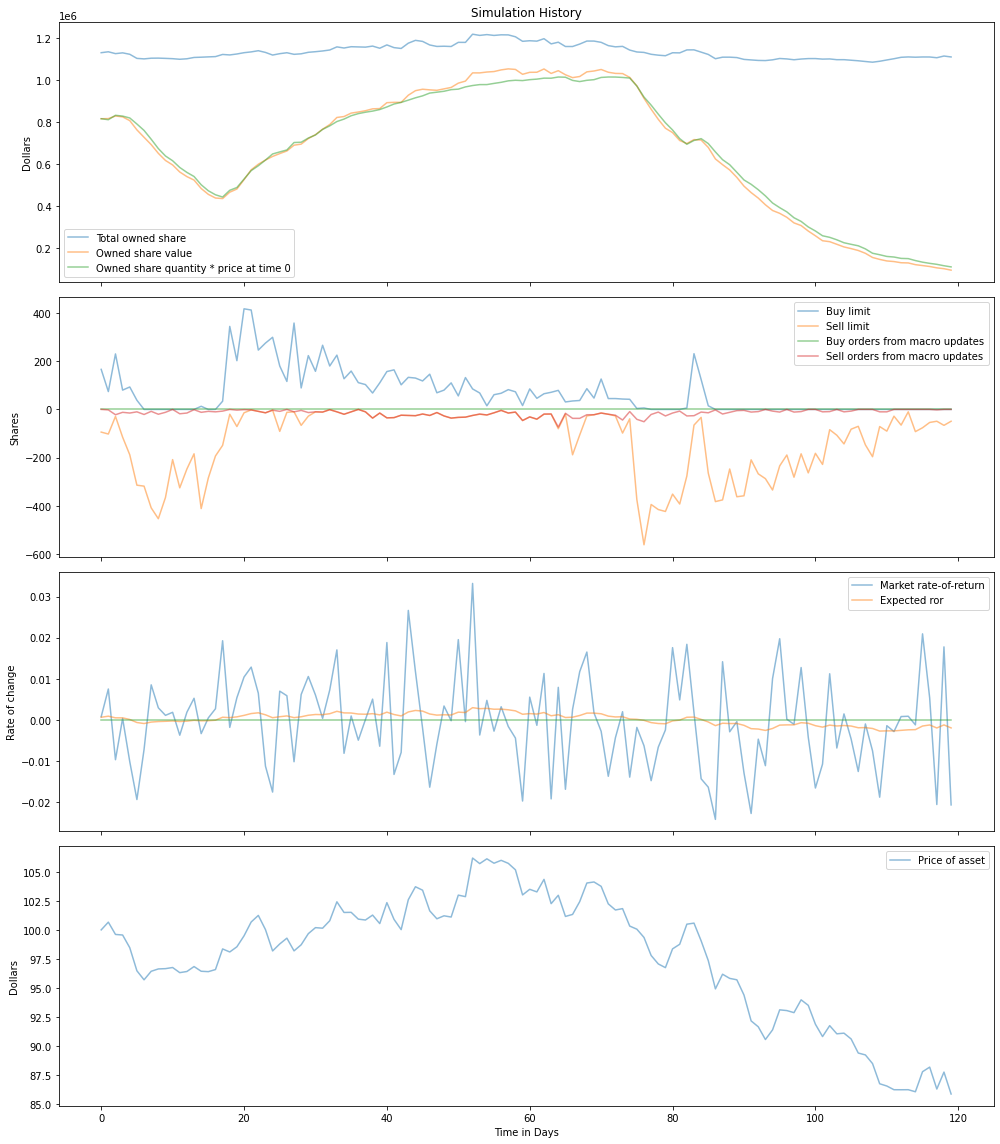

In [8]:
visualize_simulation_data(data)